# 1 - Perkenalan

Nama : Muhamad Fandhi 

Batch : HCK - 003

Dataset : Churn Dataset

Objective : Creating a model for predicting whether our costumers will churn or not based on the customers' behaviors.

Deployment URL :
``
https://huggingface.co/spaces/mfandhi/churn-prediction
``

# 2 - Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
import phik
from phik.report import plot_correlation_matrix

import tensorflow as tf
tf.random.set_seed(69)
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from feature_engine.transformation import BoxCoxTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report,roc_auc_score
import pickle
import warnings
warnings.simplefilter("ignore")

# 3 - Data Loading

Importing dataset csv file.

In [2]:
# Load Dataset

df_ori = pd.read_csv('churn.csv')
df = df_ori.copy() # copying dataset
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [3]:
# Showing first 10 of dataset

df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,...,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,...,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [4]:
# Showing last 10 of dataset

df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [5]:
# Check Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

Here, we can see that the joining date column data type is still object, we want to convert it to datetime format.

In [6]:
df['joining_date'] = pd.to_datetime(df['joining_date'])

In [7]:
df.last_visit_time

0        22:29:49
1        15:44:56
2        20:31:53
3        14:28:05
4        04:16:48
           ...   
37005    09:32:50
37006    02:28:52
37007    17:50:38
37008    17:07:57
37009    03:50:49
Name: last_visit_time, Length: 37010, dtype: object

Next we want to see the overview of numerical and categorical data. We will also group the numerical and categorical columns.

In [8]:
# Check Dataset 

df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


We have min value data on days since last login column that have -999 value, which is an anomaly. We want to check this before we continue to the next section.

In [9]:
# showing -999 value on days since last login column

df[df['days_since_last_login']==-999][['days_since_last_login']]

,days_since_last_login
56,-999
71,-999
90,-999
119,-999
120,-999
...,...
36952,-999
36965,-999
36973,-999
36999,-999


There are 1999 rows of data that have this value, we will assume this -999 values are missing values that needs to be handled.

In [10]:
# convert -999 value to nan

df['days_since_last_login'].replace(to_replace=-999, value=pd.np.nan, inplace=True)

In [11]:
# Check Dataset

df.describe(include='O')

,user_id,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,37010,36951,31579,37010,31568,36722,31615,37010,37010,37010,37010,37010,37010,37010
unique,36992,2,3,6,2,3,3,3,30101,2,2,2,5,9
top,b749631fc10ff0da,F,Town,Basic Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,2,18497,14135,7727,15846,12357,13917,12417,6,20353,20449,18611,18611,6353


In [12]:
# Group columns by datatype

num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
print(cat_columns)
print(num_columns)

['user_id', 'gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


We want to check if there are missing values in our dataset.

In [13]:
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login           2001
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [14]:
df[df.isna().any(axis=1)]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,...,1397.318999,29664.01,28.0,782.49,No,Yes,Yes,Unsolved,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.01,Yes,No,No,Not Applicable,Poor Customer Service,1
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [15]:
14146/len(df)

0.3822210213455823

Here, we can see that we have 14146 rows with missing values or 38% of our data. We will handle this later on preprocessing section.

In [16]:
df.duplicated().sum()

18

Here, we can see there are 18 duplicated data on our dataset. We will drop these rows and continue to the next section.

In [17]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

# 4 - Exploratory Data Analysis

In this section we will explore our data further to have better understanding about our data.

## Numerical Columns

First we will explore the numerical columns.

Skewness of age : -0.007319319267324801
Skewness of days_since_last_login : 0.028518603917912035
Skewness of avg_time_spent : 2.2765487001579205
Skewness of avg_transaction_value : 1.0110271627457472
Skewness of avg_frequency_login_days : 0.38986070002523915
Skewness of points_in_wallet : -0.7734917908458531


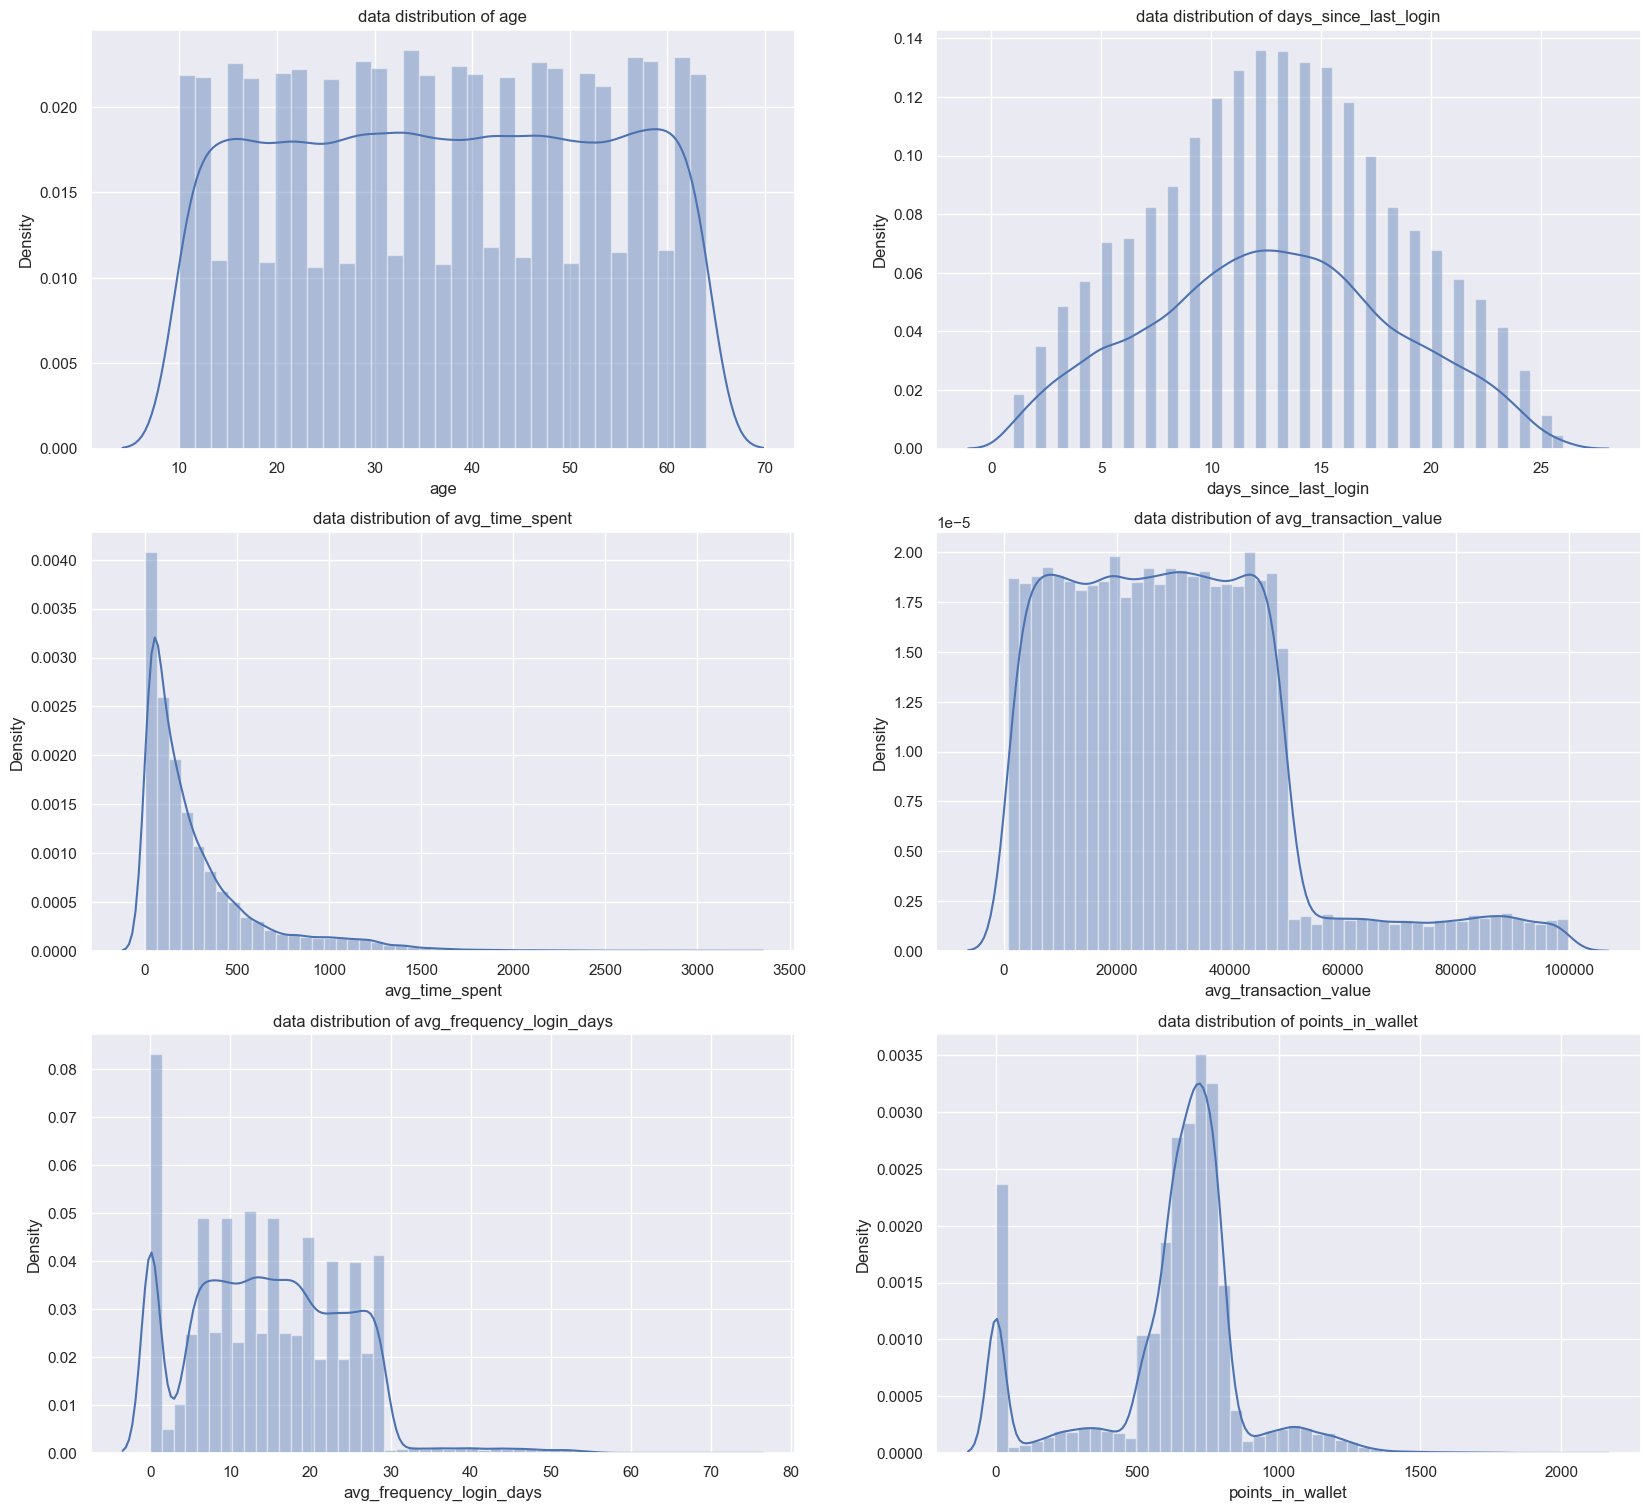

In [18]:
x = 1
plt.figure(figsize=(20,25))
sns.set(color_codes=True)
for col in num_columns[:6]:
    print(f'Skewness of {col} : {df[col].skew()}')
    plt.subplot(4,2,x)
    sns.distplot(df[col])
    plt.title(f'data distribution of {col}')
    x+=1

In [19]:
df[num_columns[:6]].describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,36992.000000,34993.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,12.758552,279.147450,29271.194003,14.658617,623.562421
std,15.867412,5.572600,329.947709,19444.806226,9.479184,270.263994
min,10.000000,1.000000,0.000000,800.460000,0.000000,0.000000
25%,23.000000,9.000000,60.102500,14177.540000,7.000000,574.135000
50%,37.000000,13.000000,161.765000,27554.485000,14.000000,680.370000
75%,51.000000,17.000000,356.515000,40855.110000,22.000000,757.002500
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761


Here, we have 6 numerical columns. From the age column, we can see that our customers' age are ranging from 10 to 51 years old, and pretty evenly distributed with average age 37 years old. From the days since last login column, we can see that the last login days of our customers average is 12 days and the longest is 26 days. This columns distribution is normaly distributed. From the average time spent on the website, the lowest is 0 and the longest is 3235 with average 279. From the average transaction value, we have the minimum value is 800 and the highest value is 99914 with the average 29271. From the average frequency login days, we have the most days is 73 and the lowest is 0 with the average is 14 days. From the points in wallet, we have the lowest is 0 and the highes tis 2069 with average 623.

## Categorical Columns

Next, we will explore the categorical columns.

### Binary Columns

F    18490
M    18443
Name: gender, dtype: int64
No     15839
Yes    15715
Name: joined_through_referral, dtype: int64
Yes    20342
No     16650
Name: used_special_discount, dtype: int64
Yes    20440
No     16552
Name: offer_application_preference, dtype: int64
No     18602
Yes    18390
Name: past_complaint, dtype: int64
1    20012
0    16980
Name: churn_risk_score, dtype: int64


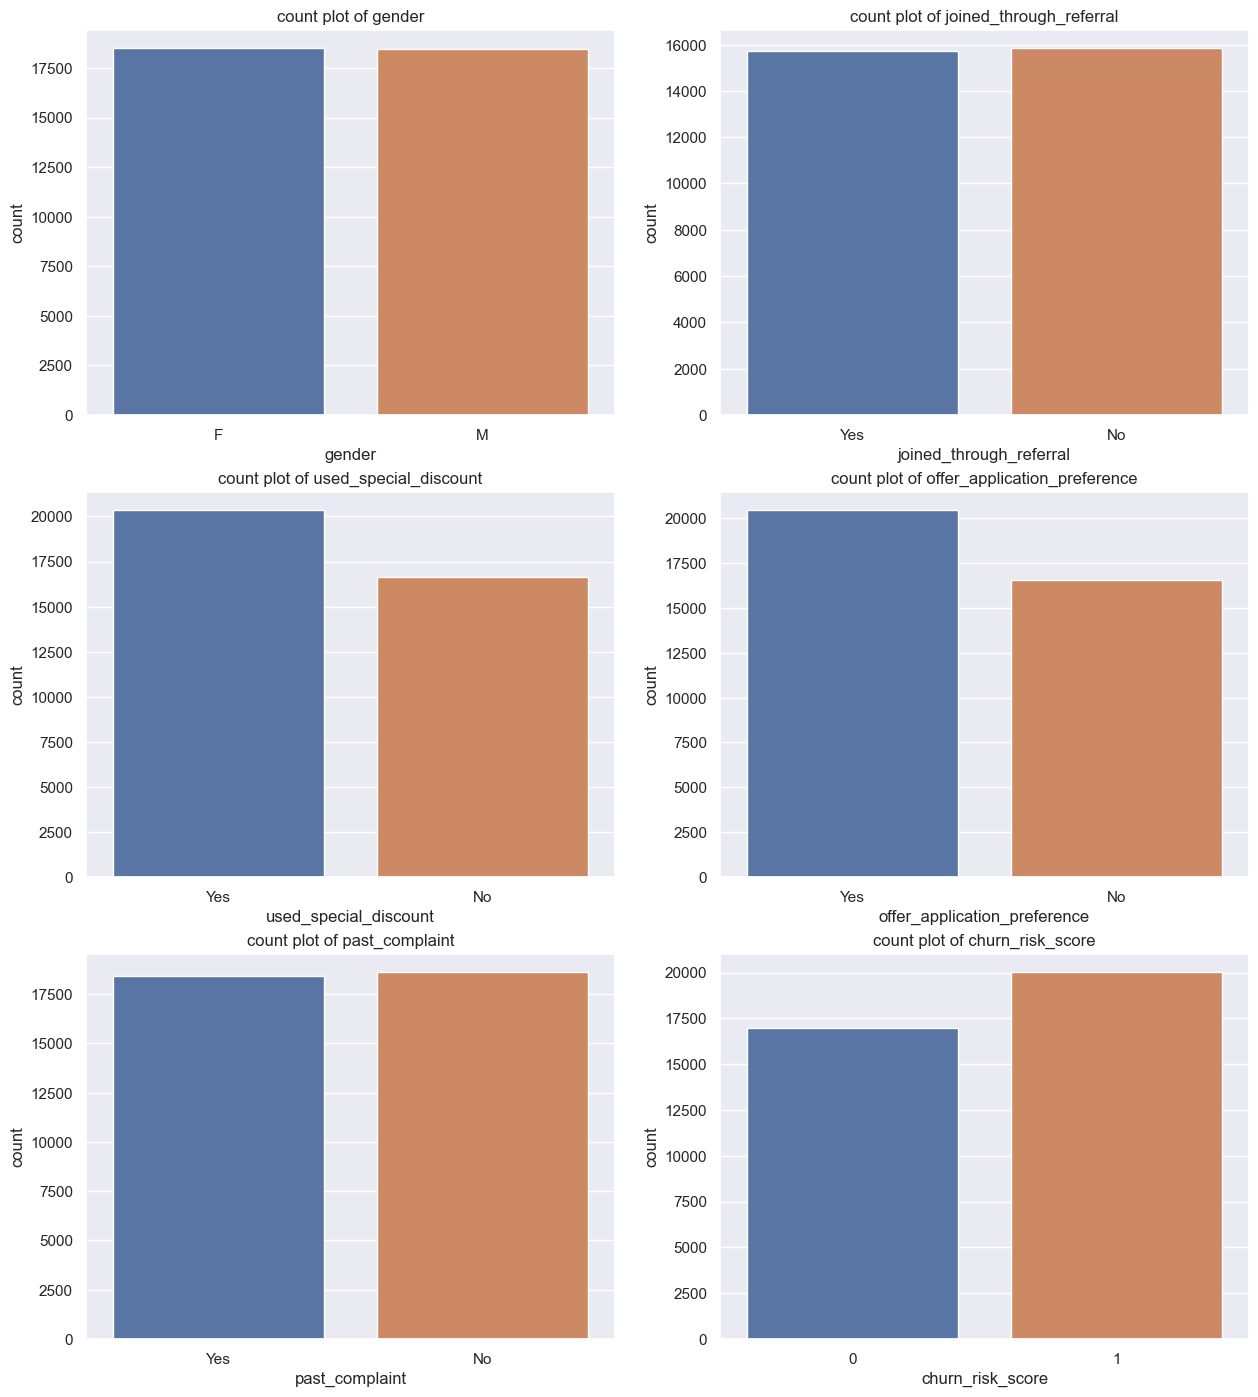

In [20]:
bin_cols = ['gender','joined_through_referral', 'used_special_discount','offer_application_preference','past_complaint','churn_risk_score']
x = 1
plt.figure(figsize=(15,17))
sns.set(color_codes=True)
for col in bin_cols:
    print(df[col].value_counts())
    plt.subplot(3,2,x)
    sns.countplot(df[col])
    plt.title(f'count plot of {col}')
    x+=1

For the binary label columns we have 6 columns; gender, joined through referral, used special discount, offer application preference, past complaint, and chur risk score (target column). We can see that for the binary label columns, we have pretty even count on both labels in each columns, even our target column is pretty balanced.

### Ternary Columns

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64
Desktop       13913
Smartphone    13876
Both           3810
Name: medium_of_operation, dtype: int64
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64


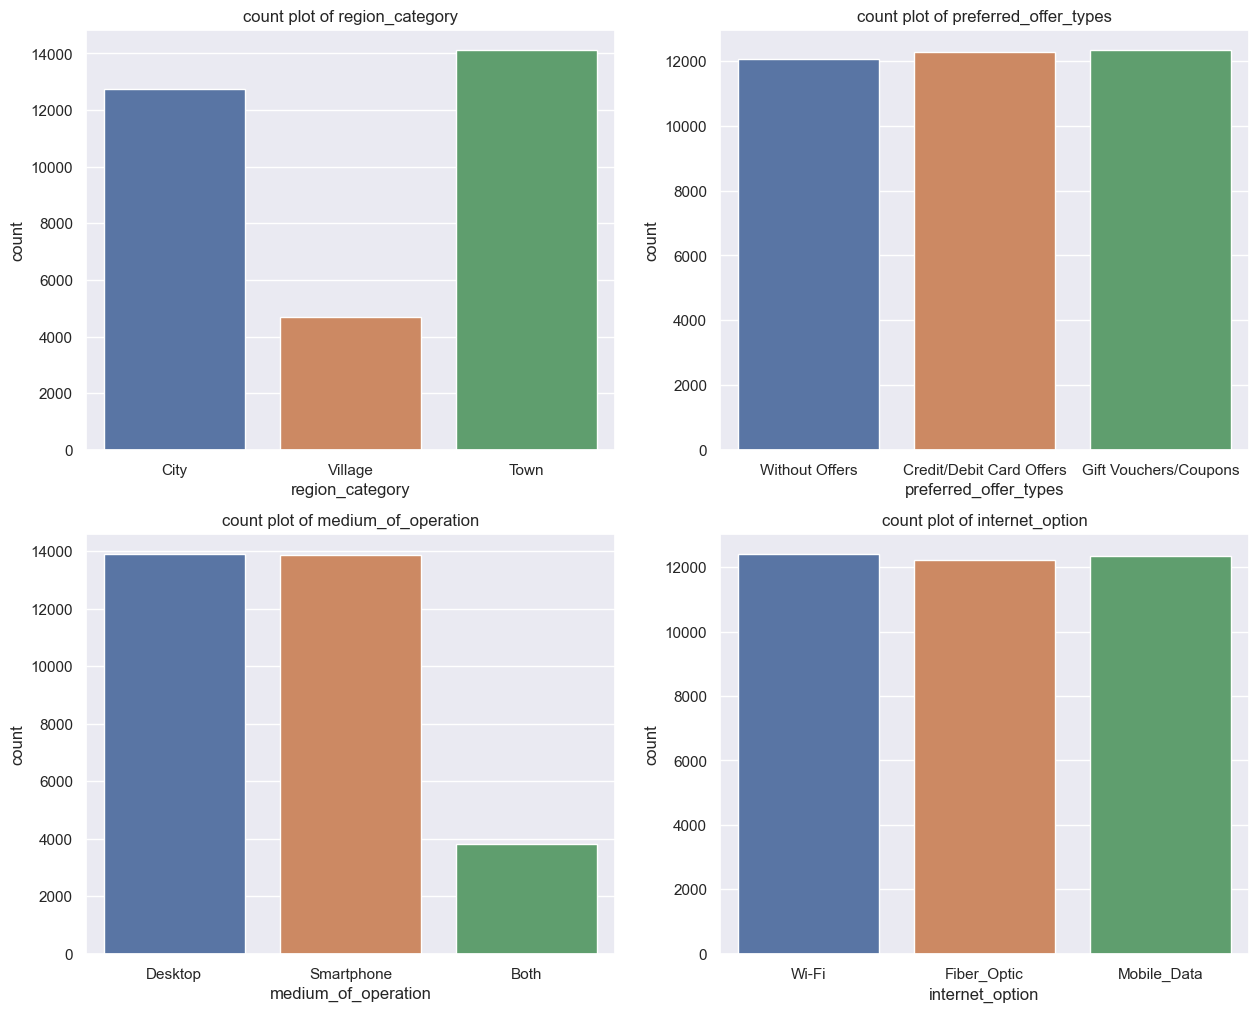

In [21]:
ter_cols = ['region_category','preferred_offer_types','medium_of_operation','internet_option']
x = 1
plt.figure(figsize=(15,12))
sns.set(color_codes=True)
for col in ter_cols:
    print(df[col].value_counts())
    plt.subplot(2,2,x)
    sns.countplot(df[col])
    plt.title(f'count plot of {col}')
    x+=1

For the ternary label columns, we have 4 columns; region category, preferred offer types, medium of operation, and internet option. For preferred offer types and internet option column, we have pretty balanced count for each label. For the region category the village category is quite low compared to the others, which means our customers are mostly originated from city and town. For the medium of operation column, we have balanced number of customers that use desktop and smartphone, but quite low number of customers that use both medium.

### Other Columns

In [22]:
oth_cols = ['membership_category','complaint_status','feedback']

#### Membership Category

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64


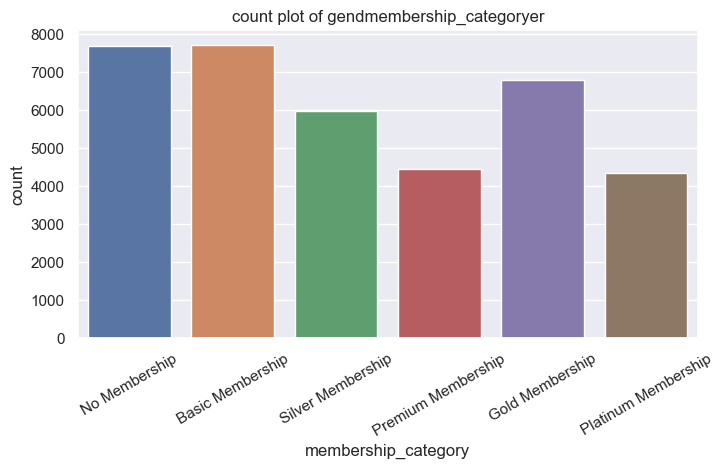

In [23]:
print(df.membership_category.value_counts())
plt.figure(figsize=(8,4))
sns.countplot(df['membership_category'])
plt.xticks(rotation=30)
plt.title(f'count plot of gendmembership_categoryer');

Next, we have the membership category column. We have 6 class of membership for our customers which are no membership, basic membership, silver membership, gold membership, platinum membership and premium membership. The number of customers are quite even on no membership, basic membership and gold membership. The premium and platinum membrship is lower than the other membership category.

#### Complaint Status

No     15839
Yes    15715
Name: joined_through_referral, dtype: int64


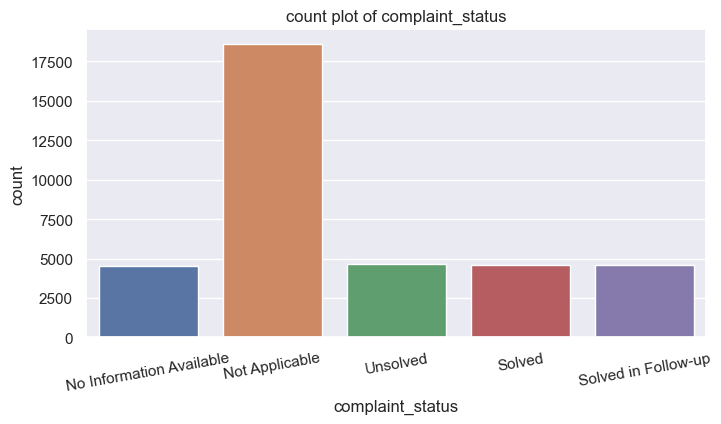

In [24]:
print(df.joined_through_referral.value_counts())
plt.figure(figsize=(8,4))
sns.countplot(df['complaint_status'])
plt.xticks(rotation=10)
plt.title(f'count plot of complaint_status');

Next, we have the complaint status column. Most of the complaint from our customers are not applicable.

#### Feedback

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64


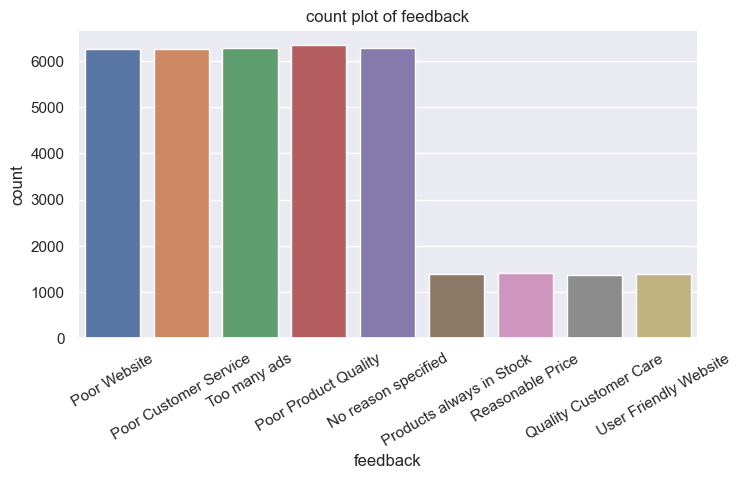

In [25]:
print(df.feedback.value_counts())
plt.figure(figsize=(8,4))
sns.countplot(df['feedback'])
plt.xticks(rotation=30)
plt.title(f'count plot of feedback');

Next, we have the feedback columns. There are 9 categories in feedback columns. The bad feedback are more than the positive feedback. Which means our customers are not satisfied with our products.

# 5 - Data Preprocessing

In this section we will process the data before we go into the modelling section.

## Feature Selection

For selecting the features we will calculate the correlation for each features against the target which is churn risk score. We will do the calculation using phik correlation since it can calculate for both categorical and numerical features in one go.

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


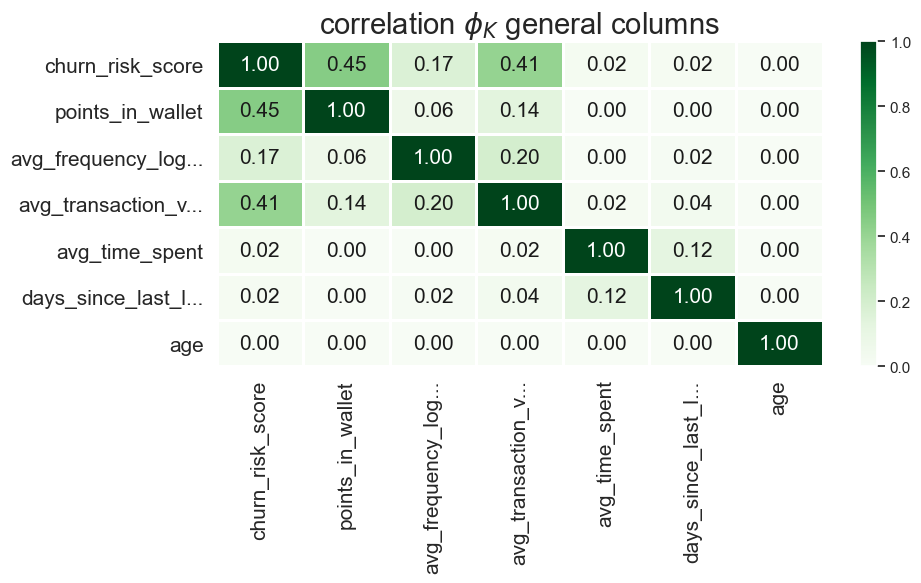

In [26]:
cor1 = df[num_columns].phik_matrix()

plot_correlation_matrix(cor1.values, 
                        x_labels=cor1.columns, 
                        y_labels=cor1.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ general columns", 
                        fontsize_factor=1.5, 
                        figsize=(10,6))
plt.tight_layout()

interval columns not set, guessing: ['churn_risk_score']


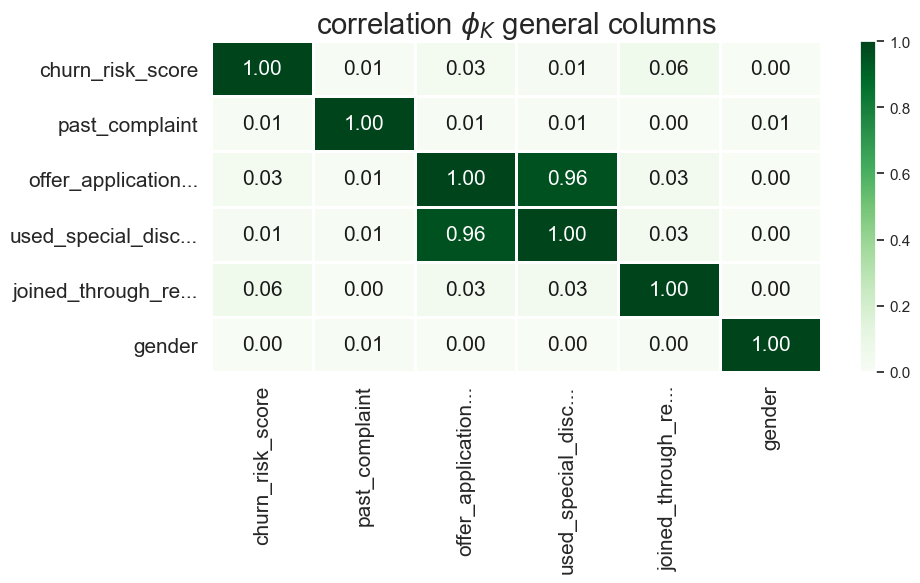

In [27]:
cor2 = df[bin_cols].phik_matrix()

plot_correlation_matrix(cor2.values, 
                        x_labels=cor2.columns, 
                        y_labels=cor2.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ general columns", 
                        fontsize_factor=1.5, 
                        figsize=(10,6))
plt.tight_layout()

interval columns not set, guessing: ['churn_risk_score']


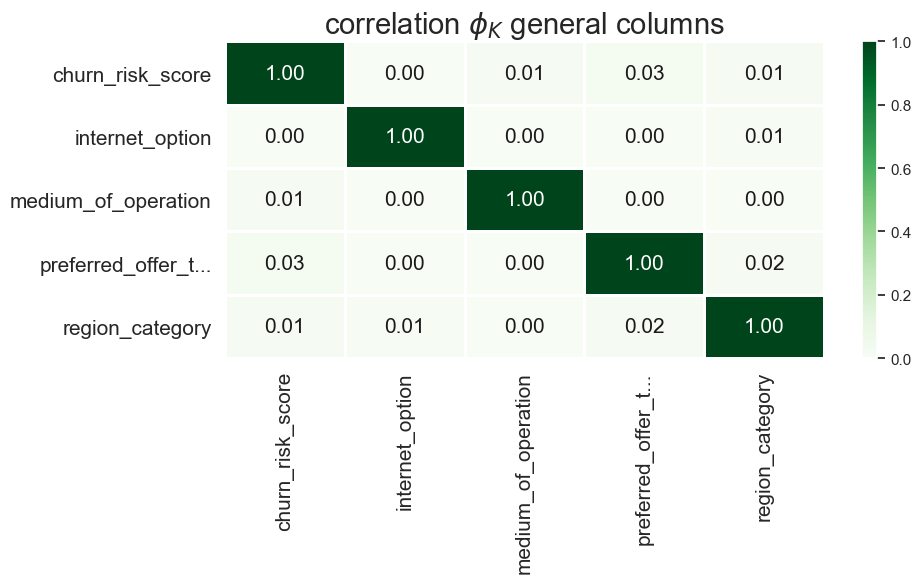

In [28]:
cor3 = df[ter_cols+['churn_risk_score']].phik_matrix()

plot_correlation_matrix(cor3.values, 
                        x_labels=cor3.columns, 
                        y_labels=cor3.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ general columns", 
                        fontsize_factor=1.5, 
                        figsize=(10,6))
plt.tight_layout()

interval columns not set, guessing: ['churn_risk_score']


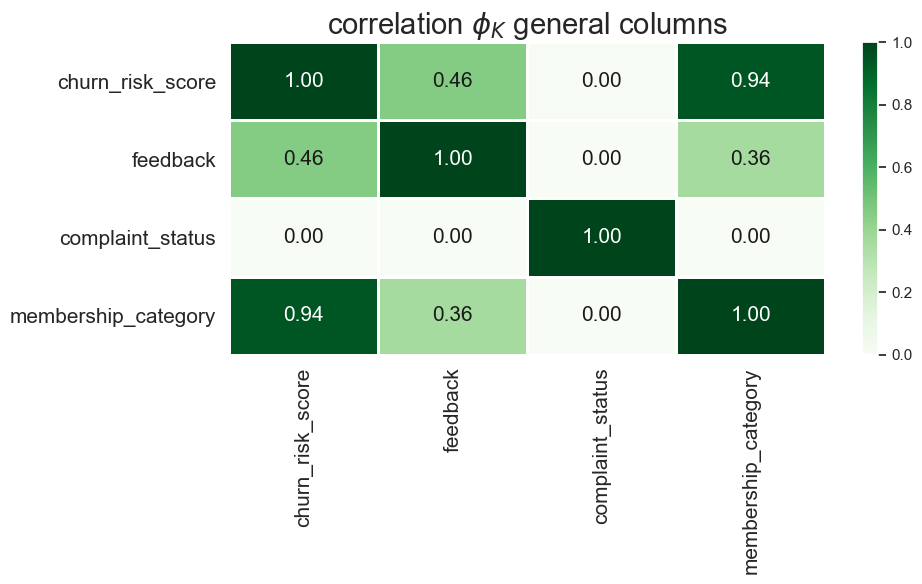

In [29]:
cor4 = df[oth_cols+['churn_risk_score']].phik_matrix()

plot_correlation_matrix(cor4.values, 
                        x_labels=cor4.columns, 
                        y_labels=cor4.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ general columns", 
                        fontsize_factor=1.5, 
                        figsize=(10,6))
plt.tight_layout()

Here, we will remove the columns that have no correlation or the score is 0.00. We will use the columns that have correlation score 0.01 and above.

In [30]:
# naming the columns that have below 0.01 correlation score

drop_cols = ['user_id','joining_date','last_visit_time','age','gender','internet_option','complaint_status']

In [31]:
# New dataframe variable for modelling

data_train_test = df.drop(columns=drop_cols)
data_train_test

,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score
0,NaN,No Membership,Yes,Without Offers,NaN,4.0,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,Poor Website,1
1,NaN,Basic Membership,Yes,Without Offers,Desktop,11.0,338.150000,7665.66,17.0,575.97,Yes,No,Yes,Poor Customer Service,1
2,City,Silver Membership,NaN,Credit/Debit Card Offers,NaN,8.0,235.140000,37671.69,5.0,767.93,Yes,No,Yes,Too many ads,0
3,Village,No Membership,No,Credit/Debit Card Offers,Desktop,10.0,56.670000,15678.14,11.0,590.22,No,Yes,No,Too many ads,1
4,Town,Silver Membership,NaN,Gift Vouchers/Coupons,Smartphone,9.0,153.990000,8422.68,0.0,722.04,Yes,No,No,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,Town,Gold Membership,NaN,Credit/Debit Card Offers,NaN,15.0,199.330000,29455.29,9.0,846.52,Yes,Yes,No,User Friendly Website,0
36988,City,Gold Membership,Yes,Without Offers,Desktop,15.0,368.500000,27038.47,8.0,835.98,No,Yes,No,Reasonable Price,0
36989,NaN,Gold Membership,Yes,Without Offers,NaN,13.0,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Poor Customer Service,0
36990,City,Gold Membership,Yes,Without Offers,Desktop,NaN,65.070000,46108.73,6.0,744.99,No,Yes,No,Poor Website,0


## Splitting Dataset

Next step is splitting the dataset into X (features) and y (target).

In [32]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('churn_risk_score', axis=1)
y = data_train_test['churn_risk_score']
X

,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback
0,NaN,No Membership,Yes,Without Offers,NaN,4.0,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,Poor Website
1,NaN,Basic Membership,Yes,Without Offers,Desktop,11.0,338.150000,7665.66,17.0,575.97,Yes,No,Yes,Poor Customer Service
2,City,Silver Membership,NaN,Credit/Debit Card Offers,NaN,8.0,235.140000,37671.69,5.0,767.93,Yes,No,Yes,Too many ads
3,Village,No Membership,No,Credit/Debit Card Offers,Desktop,10.0,56.670000,15678.14,11.0,590.22,No,Yes,No,Too many ads
4,Town,Silver Membership,NaN,Gift Vouchers/Coupons,Smartphone,9.0,153.990000,8422.68,0.0,722.04,Yes,No,No,Poor Product Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,Town,Gold Membership,NaN,Credit/Debit Card Offers,NaN,15.0,199.330000,29455.29,9.0,846.52,Yes,Yes,No,User Friendly Website
36988,City,Gold Membership,Yes,Without Offers,Desktop,15.0,368.500000,27038.47,8.0,835.98,No,Yes,No,Reasonable Price
36989,NaN,Gold Membership,Yes,Without Offers,NaN,13.0,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Poor Customer Service
36990,City,Gold Membership,Yes,Without Offers,Desktop,NaN,65.070000,46108.73,6.0,744.99,No,Yes,No,Poor Website


Next, we want to split each X and y data into train, validation, and test data. We will set the test size 10% of our dataset, and 90% for val and train set.

In [33]:
# Split between Train-Set, Validation-Set, and Test-Set
# Stratify y to balance the target value in each split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, stratify=y, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, stratify=y_train, random_state=69)

print('Train Size : ', X_train.shape)
print('Val size : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (26633, 14)
Val size :  (6659, 14)
Test Size  :  (3700, 14)


Now that we have split the data into Train-Set, Validation-Set, and Test-Set, we can proceed to the next section.

## Handling Outlier

In this section we will handle the outliers that exist in our data. First, we check the outliers in our dataset using our defined function.

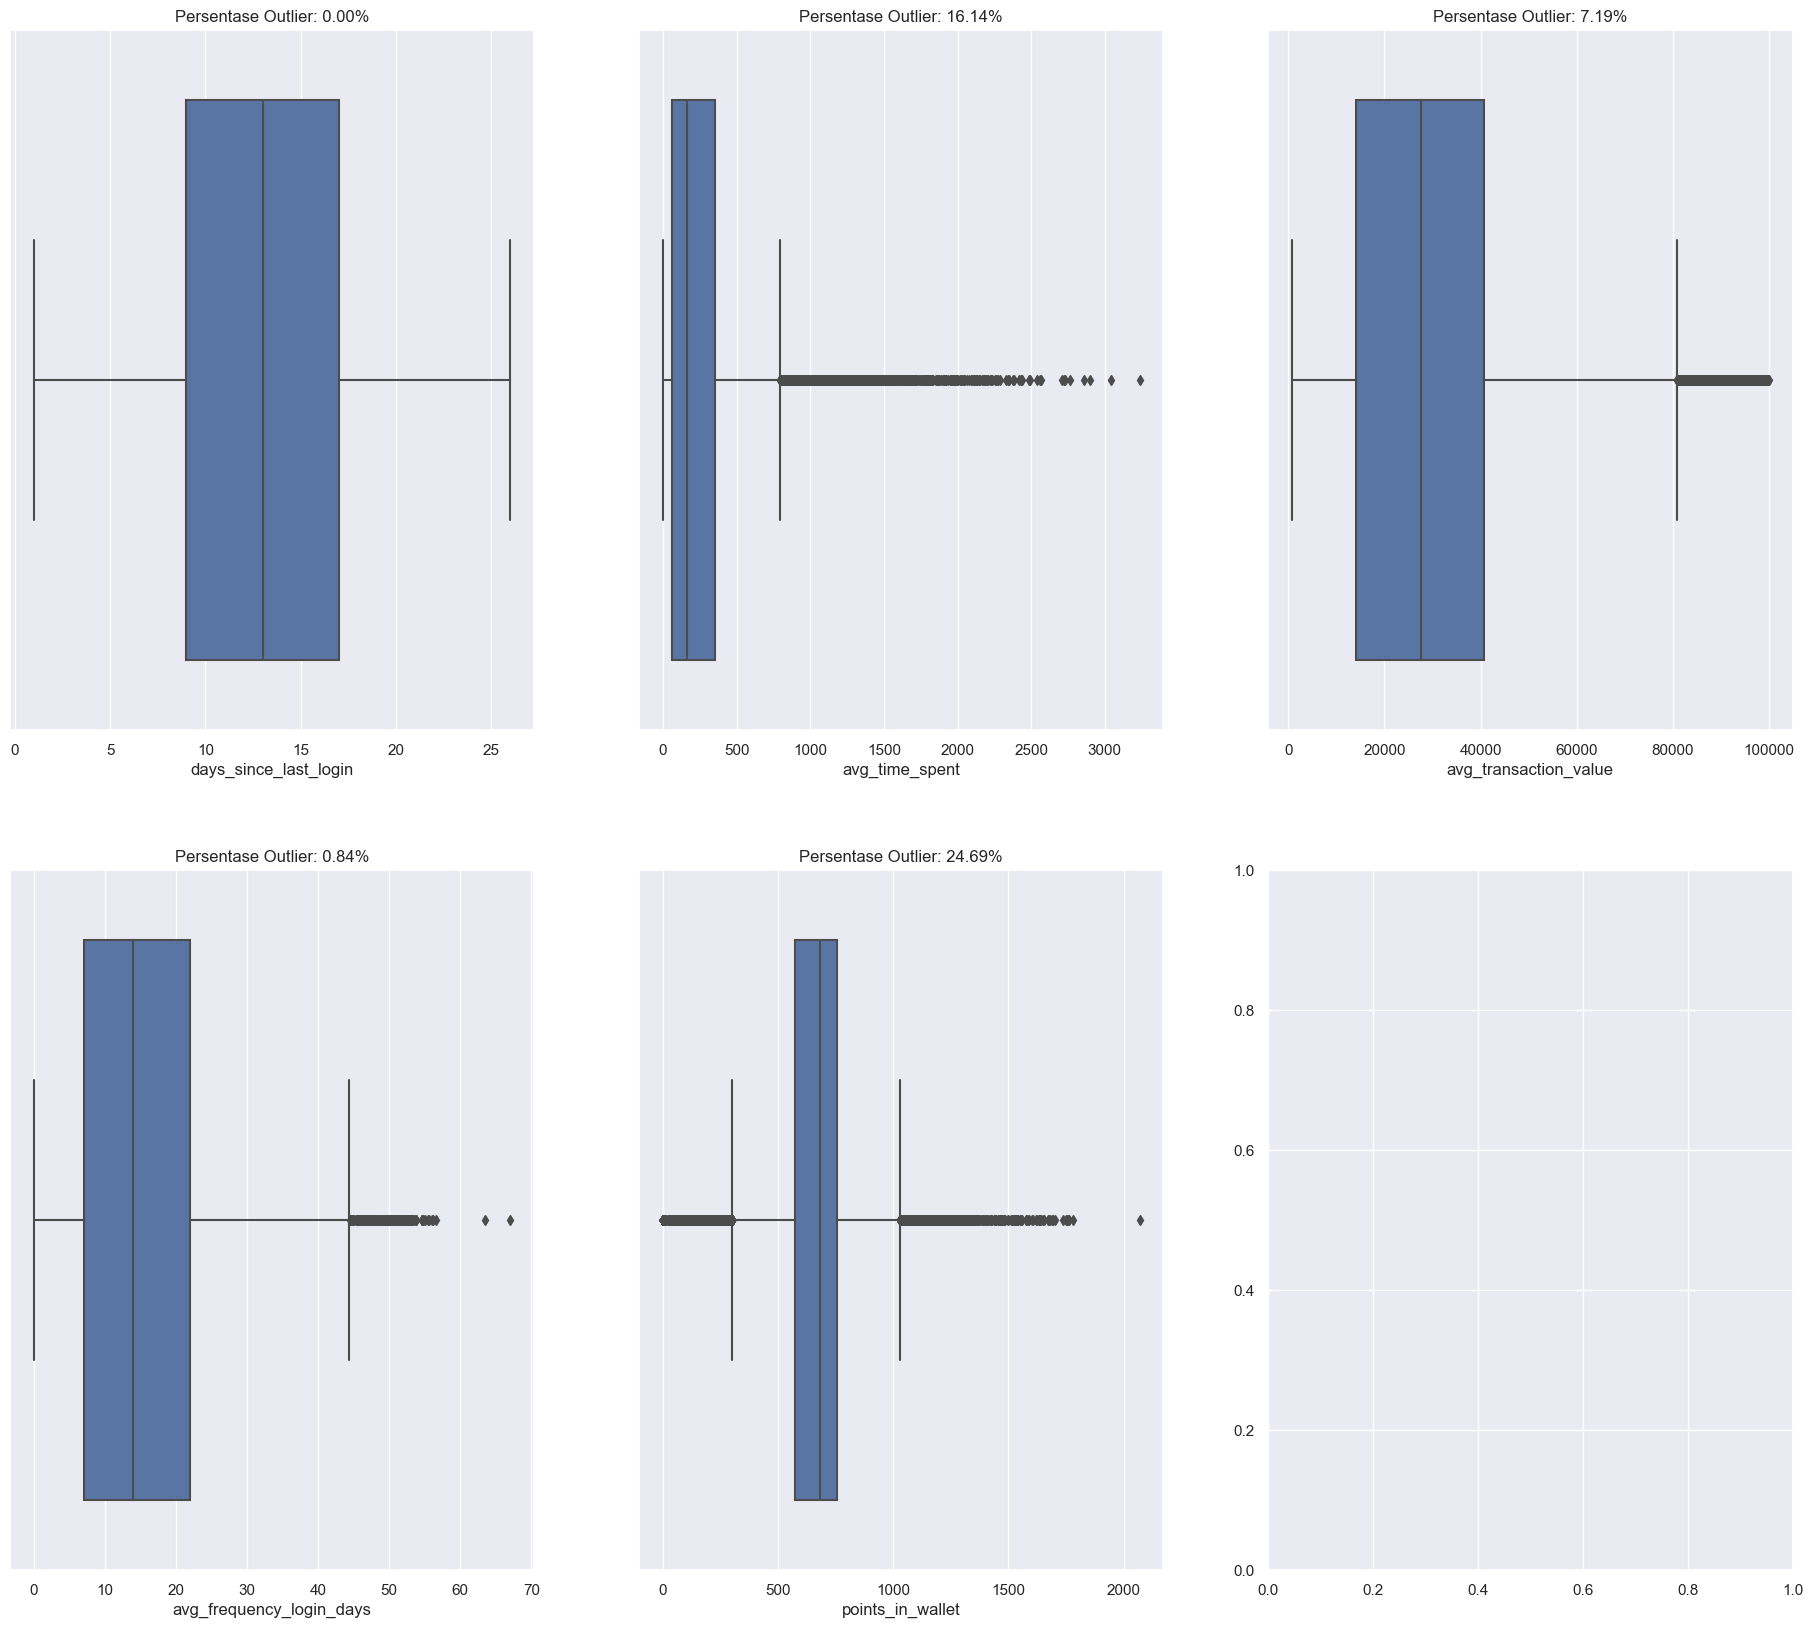

In [34]:
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Defining function for outliers detection.

def outlier_analysis(data,col):
  skewness = data[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = data[col].mean() + 3*data[col].std()
    lower = data[col].mean() - 3*data[col].std()
  else:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + 1.5*IQR
    lower = Q3 - 1.5*IQR
  
  no_outliers = data[(data[col]>=lower) & (data[col]<=upper)]
  outliers = data[(data[col]<lower) | (data[col]>upper)]

  return outliers, upper, lower

fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(23,20))
x=0
for i in range(2):
  for j in range(3):
    try:
      out, up, low = outlier_analysis(X_train,num_cols[x])
      sns.boxplot(X_train[num_cols[x]],ax=ax[i][j])
      ax[i][j].set_title('Persentase Outlier: {:.2f}%'.format(len(out)*100/len(X_train)))
      x+=1
    except:
      pass
plt.show()

From these boxplot, we know that there are 3 columns that have outliers ('avg_time_spent', 'avg_transaction_value', and ,'points_in_wallet'). We will handle these 3 columns using boxcox transformation later using boxcox. But since these columns contain zero values, we need to transform it into a small value close to zero like 0.00001 so that the boxcox can work with these columns. We will do this simultaneously later using column transformer. 

## Handling Missing Values

In the beginning of this notebook, we've checked the missing values in our data. Here, we will handle our missing values. We will impute all the missing values since the columns that have missing values correlation with our target is low. For the numerical columns, we wil impute using the mean and for categorical columns, we will impute with mode.

In [35]:
# checking missing values in our train, val, and test set
datasets = [X_train, X_test, X_val]
dataset_names = ['X_train', 'X_test', 'X_val']

for data, name in zip(datasets, dataset_names):
    print(f"Number of missing values in {name}: {data.isnull().sum().sum()}")

Number of missing values in X_train: 13388
Number of missing values in X_test: 1816
Number of missing values in X_val: 3342


In [36]:
# imputing train set missing values
for col in X_train.columns:
    if X_train[col].isnull().sum()!=0:
        if X_train[col].dtype=='float64':
            value=np.mean(X_train[col])
            X_train[col].fillna(value,inplace=True)
        else:
            value=mode(X_train[col].dropna()).mode[0]
            X_train[col].fillna(value,inplace=True)

# imputing val and test set missing values
for data in [X_test, X_val]:
    for col in data.columns:
        if data[col].isnull().sum() != 0:
            if X_train[col].dtype=='float64':
                value=np.mean(data[col])
                data[col].fillna(value,inplace=True)
            else:
                value=mode(data[col].dropna()).mode[0]
                data[col].fillna(value,inplace=True)

In [37]:
# checking missing values in our train, val, and test set
datasets = [X_train, X_test, X_val]
dataset_names = ['X_train', 'X_test', 'X_val']

for data, name in zip(datasets, dataset_names):
    print(f"Number of missing values in {name}: {data.isnull().sum().sum()}")

Number of missing values in X_train: 0
Number of missing values in X_test: 0
Number of missing values in X_val: 0


Now that we have no missing values in each set, we will continue to the next section.

## Column Transforming

In this section we will create a pipeline for transforming the data. Before we create the pipeline, we want to remove the 0 values on numerical features that have outliers because we want to use boxcox transformer. We will replace the 0 values with a small value close to 0, in this case we use 0.00001.

In [38]:
# replace zeros function
def replace_zeros(X):
    return np.where(X == 0, 0.00001, X)

# columns that have outliers
col_rz = ['avg_time_spent','avg_transaction_value','points_in_wallet']

# replacing 0 on the 3 columns
dataframes = [X_train, X_val, X_test]
for df in dataframes:
    df[col_rz] = df[col_rz].apply(replace_zeros)


In [39]:
# numerical features tansformer
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
numeric_transformer = Pipeline(
    steps=[('boxcox', BoxCoxTransformer(variables = ['avg_time_spent','avg_transaction_value','points_in_wallet'])), ("scaler", StandardScaler())]
)

# onehot features transformer
ohe_features = X_train.select_dtypes(include=['object']).columns.tolist()
ohe_transformer = OrdinalEncoder() 

# ordinal features transformer
ordinal_features = X_train.select_dtypes(include=['object']).columns.tolist()
ord_transformer = OrdinalEncoder() 

# defining the columns transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("ord",ord_transformer,ordinal_features)
    ], remainder='passthrough' 
)

After creating the pipeline for transforming our data, we will transform our data train, val, and test.

In [40]:
# transforming the X_train, X_val, and X_test

X_train_final = preprocessor.fit_transform(X_train)     
X_val_final = preprocessor.transform(X_val)
X_test_final = preprocessor.transform(X_test)

After transforming our data we want to check the transformed data.

In [41]:
# showing transformed X_train
X_train_final

array([[ 0.59206726, -0.93658966,  0.92464961, ...,  0.        ,
         0.        ,  0.        ],
       [-0.88483329,  0.17384319,  0.93277676, ...,  1.        ,
         0.        ,  7.        ],
       [-1.62328356, -0.98157228,  0.5869142 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.51560815,  2.48175882, -0.84634523, ...,  1.        ,
         0.        ,  3.        ],
       [ 1.69974267, -0.58010655,  0.63056482, ...,  0.        ,
         1.        ,  2.        ],
       [ 0.22284213,  0.94606562,  0.36165793, ...,  1.        ,
         0.        ,  7.        ]])

In [42]:
# showing transformed X_val
X_val_final

array([[ 0.9612924 , -0.24789581,  0.86282672, ...,  1.        ,
         1.        ,  7.        ],
       [-0.51560815, -0.36813306,  0.88097817, ...,  1.        ,
         0.        ,  2.        ],
       [-1.43867099,  0.18390095,  1.4218562 , ...,  1.        ,
         0.        ,  6.        ],
       ...,
       [ 2.25358038, -0.45146566,  0.34079606, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03822956, -0.94758225, -0.02664055, ...,  0.        ,
         1.        ,  7.        ],
       [ 0.77667983, -2.6063137 ,  0.24258371, ...,  0.        ,
         1.        ,  7.        ]])

In [43]:
# showing transformed X_test
X_test_final

array([[ 0.77667983,  0.79616305,  0.06959693, ...,  0.        ,
         1.        ,  2.        ],
       [-0.02563014,  0.62308445,  2.55762261, ...,  0.        ,
         1.        ,  5.        ],
       [-1.06944585,  1.88032759, -1.07032213, ...,  1.        ,
         0.        ,  7.        ],
       ...,
       [ 0.03822956,  1.77056071, -1.38815734, ...,  1.        ,
         1.        ,  0.        ],
       [-0.33099558, -0.780259  ,  0.98343201, ...,  0.        ,
         1.        ,  7.        ],
       [ 0.59206726,  0.80069868,  0.51077785, ...,  0.        ,
         0.        ,  2.        ]])

To have better visual of our data train, we will convert it to dataframe format.

In [44]:
# Putting the transformed data inside dataframe

X_train_final_df = pd.DataFrame(X_train_final,columns=numeric_features+ordinal_features)
X_train_final_df

,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,used_special_discount,offer_application_preference,past_complaint,feedback
0,0.592067,-0.936590,0.924650,-0.278591,0.464795,0.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0
1,-0.884833,0.173843,0.932777,-0.595449,0.386025,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,7.0
2,-1.623284,-0.981572,0.586914,-0.701068,-0.103880,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,2.253580,-0.762135,-0.968432,-0.172972,0.099493,0.0,2.0,1.0,2.0,2.0,0.0,1.0,1.0,2.0
4,1.145905,-0.157392,-0.189715,-0.912307,0.529339,0.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26628,0.776680,0.190531,0.172499,0.143886,0.479777,1.0,5.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
26629,-0.884833,0.739165,-1.702201,-1.017926,0.621663,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,4.0
26630,-0.515608,2.481759,-0.846345,0.143886,0.326275,2.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,3.0
26631,1.699743,-0.580107,0.630565,0.143886,0.360104,0.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,2.0


## VIF

Before we continue to model definition, we want to know if all the features selected don't have multi-colinearity. Since VIF can only be calculated for numerical columns, we calculate the vif after we have all our data ready for modelling (scaled and encoded). First we define a function for calculating each vif and putting it in a dataframe of vif. And then, we use the function to show the VIF value for each features.

In [45]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns.to_list()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X_train_final_df[numeric_features])

,variables,VIF
0,days_since_last_login,1.009692
1,avg_time_spent,1.009977
2,avg_transaction_value,1.010902
3,avg_frequency_login_days,1.009549
4,points_in_wallet,1.001041


Here, we can see that all features have lower than 5 VIF value and we can say that our features doesn't have multi-colinearity. Now that we have transformed the data and checked the multi colinearity, we can continue to our next section.

# 6 - TensorFlow Pipeline

In this section we will transform our data to be ready for deep learning model using tensorflow. For the train data we will set the buffer size 20000 to have better shuffled data. The batch size for each set will be the same (256) to have faster training time.

In [46]:
# tensorflow pipeline data train
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final,y_train))
train_dataset = train_dataset.shuffle(buffer_size=20000).batch(256)

# tensorflow pipeline data val
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final,y_val))
val_dataset = val_dataset.batch(256)

# tensorflow pipeline data test
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final,y_test))
test_dataset = test_dataset.batch(256)

# 7 - Model Training

In this section we will train our model using sequential and functional model.

In [47]:
# calculating hidden layer neuron for the first trial

alp = 10
inp = X_train.shape[1]
out = 1
hid = int(len(X_train)/(alp*(inp+out)))
hid2 = int(hid/3)
print(f'hidden layer 1 neurons: {hid}')
print(f'hidden layer 2 neurons: {hid2}')

hidden layer 1 neurons: 177
hidden layer 2 neurons: 59


## Sequential

For the sequential model, we will set 2 hidden layers using number of neurons that were calculated in the beginning. We will also set the parameters for each layers. The first 3 layers will have activation function relu and kernel initializer HeNormal. We will also add the kernel regularizer 'l2' on the input layer.

In [48]:
# Define Sequential Model's Architecture

model_s1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,),kernel_initializer='HeNormal',kernel_regularizer='l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(hid, activation='relu',kernel_initializer='HeNormal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(hid2, activation='relu',kernel_initializer='HeNormal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

After defining the model's architecture we will compile our model using optimizer RMSprop, loss function BinaryCrossentropy, and metrics accuracy.

In [49]:
# Define Training Configuration (Optimizer, Loss, Metrics)

model_s1.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.RMSprop(),
    
    # Loss function to minimize
    loss=tf.keras.losses.BinaryCrossentropy(),
    
    # List of metrics to monitor
    metrics=['accuracy'],
)

After defining and compiling our model, we can see the summary of our model to see the shape and the params that is available on each layer.

In [50]:
# sequential model summary
model_s1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                210       
                                                                 
 batch_normalization (BatchN  (None, 14)               56        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 177)               2655      
                                                                 
 batch_normalization_1 (Batc  (None, 177)              708       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 59)                10502     
                                                                 
 batch_normalization_2 (Batc  (None, 59)               2

After we have the model ready, we will train our model using train and val dataset.

In [51]:
# sequential model training
history_s1 = model_s1.fit(train_dataset,epochs=50,validation_data=val_dataset)

Epoch 1/50
105/105 [==============================] - 2s 4ms/step - loss: 0.7918 - accuracy: 0.7363 - val_loss: 0.8088 - val_accuracy: 0.6545
Epoch 2/50
105/105 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.7667 - val_loss: 0.6891 - val_accuracy: 0.7375
Epoch 3/50
105/105 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.7802 - val_loss: 0.6150 - val_accuracy: 0.7705
Epoch 4/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.7969 - val_loss: 0.5404 - val_accuracy: 0.8007
Epoch 5/50
105/105 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.8138 - val_loss: 0.4929 - val_accuracy: 0.8037
Epoch 6/50
105/105 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8345 - val_loss: 0.3890 - val_accuracy: 0.8371
Epoch 7/50
105/105 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8501 - val_loss: 0.3771 - val_accuracy: 0.8381
Epoch 

We will evaluate this model later in this section.

## Functional

Next we will create the functional model. For the functional model, we will set 3 hidden layers using number of neurons that were calculated in the beginning. We will concate the input layer and hidden layer 2 in this model. We will also set the parameters for each layers. The first 3 layers will have activation function relu and kernel initializer HeNormal. We will also add the kernel regularizer 'l2' on the input layer.

In [52]:
# Define Functional Model's Architecture

input_lyr = tf.keras.layers.Input(shape=(inp,))
hidden1 = tf.keras.layers.Dense(inp, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_lyr)
normal1 = tf.keras.layers.BatchNormalization()(hidden1)
hidden2 = tf.keras.layers.Dense(hid,activation='relu',kernel_initializer='HeNormal')(normal1)
concat = tf.keras.layers.concatenate([input_lyr,hidden2])
normal2 = tf.keras.layers.BatchNormalization()(concat)
hidden3 = tf.keras.layers.Dense(hid2,activation='relu',kernel_initializer='HeNormal')(normal2)
output = tf.keras.layers.Dense(out,activation='sigmoid')(hidden3)

model_f1 = tf.keras.models.Model(inputs=input_lyr,outputs=output)

After defining the model's architecture we will compile our model using optimizer RMSprop, loss function BinaryCrossentropy, and metrics accuracy.

In [53]:
# Define Training Configuration (Optimizer, Loss, Metrics)

model_f1.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.RMSprop(),
    
    # Loss function to minimize
    loss=tf.keras.losses.BinaryCrossentropy(),
    
    # List of metrics to monitor
    metrics=['accuracy'],
)

After defining and compiling our model, we can see the summary of our model to see the shape and the params that is available on each layer.

In [54]:
# functional model summary
model_f1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 14)           210         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 14)          56          ['dense_4[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 dense_5 (Dense)                (None, 177)          2655        ['batch_normalization_3[0][0]

After we have the model ready, we will train our model using train and val dataset.

In [55]:
# training functional model
history_f1 = model_f1.fit(train_dataset,epochs=50,validation_data=val_dataset)

Epoch 1/50
105/105 [==============================] - 1s 3ms/step - loss: 0.7582 - accuracy: 0.7362 - val_loss: 0.7430 - val_accuracy: 0.6909
Epoch 2/50
105/105 [==============================] - 0s 2ms/step - loss: 0.6574 - accuracy: 0.7702 - val_loss: 0.6559 - val_accuracy: 0.7349
Epoch 3/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.7855 - val_loss: 0.6049 - val_accuracy: 0.7429
Epoch 4/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.7998 - val_loss: 0.5722 - val_accuracy: 0.7542
Epoch 5/50
105/105 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.8173 - val_loss: 0.5161 - val_accuracy: 0.7998
Epoch 6/50
105/105 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8386 - val_loss: 0.4438 - val_accuracy: 0.8090
Epoch 7/50
105/105 [==============================] - 0s 2ms/step - loss: 0.3621 - accuracy: 0.8535 - val_loss: 0.3832 - val_accuracy: 0.8264
Epoch 

We will evaluate the model later in this section.

## Model Evaluation

From both of the model (sequential and functional) we will plot the loss and accuracy on each epoch.

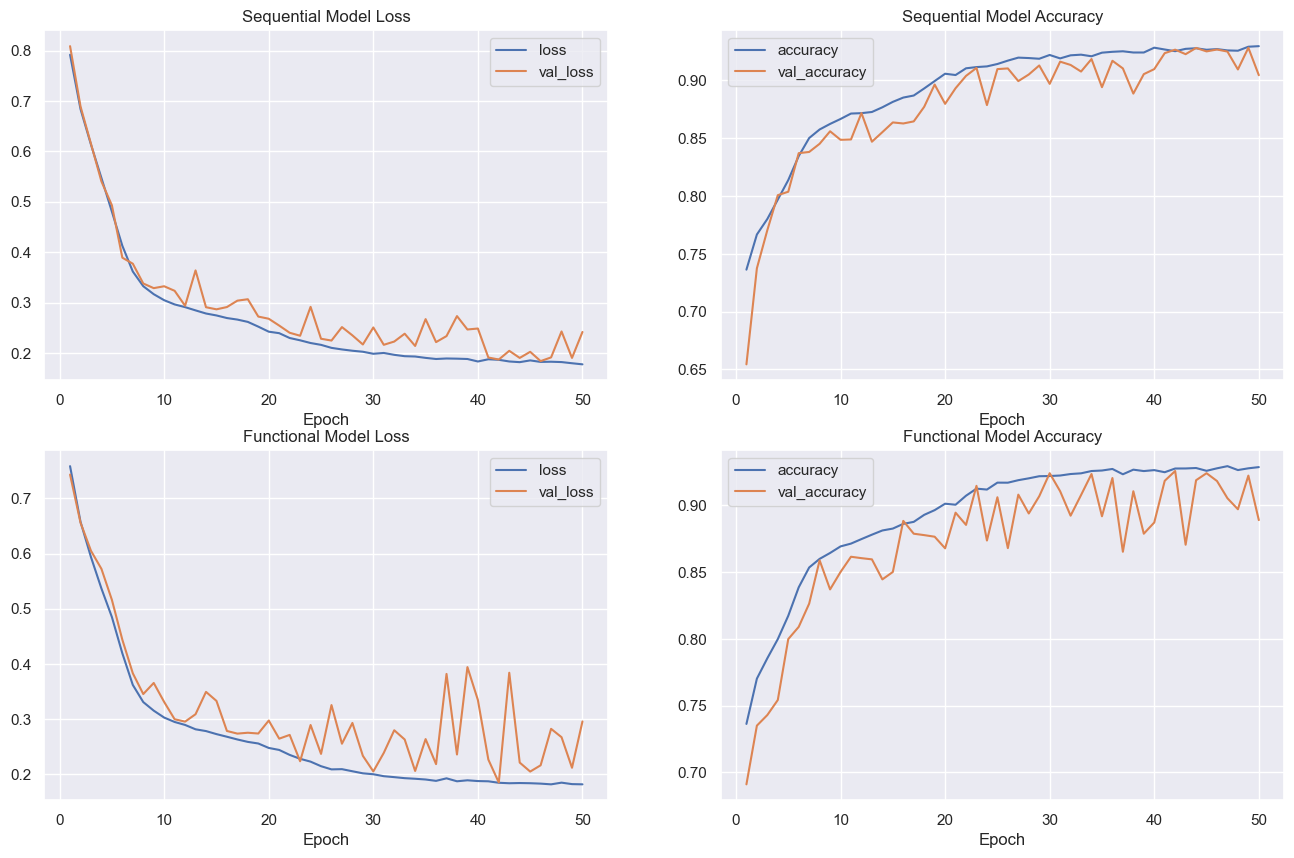

In [56]:
epoch=50

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,10))

# plotting sequential model loss
ax[0,0].plot(range(1,epoch+1),history_s1.history['loss'],label='loss')
ax[0,0].plot(range(1,epoch+1),history_s1.history['val_loss'],label='val_loss')
ax[0,0].set_title('Sequential Model Loss')
ax[0,0].legend()
ax[0,0].set_xlabel('Epoch')

# plotting sequential model accuracy
ax[0,1].plot(range(1,epoch+1),history_s1.history['accuracy'],label='accuracy')
ax[0,1].plot(range(1,epoch+1),history_s1.history['val_accuracy'],label='val_accuracy')
ax[0,1].set_title('Sequential Model Accuracy')
ax[0,1].legend()
ax[0,1].set_xlabel('Epoch')


# plotting functional model loss
ax[1,0].plot(range(1,epoch+1),history_f1.history['loss'],label='loss')
ax[1,0].plot(range(1,epoch+1),history_f1.history['val_loss'],label='val_loss')
ax[1,0].set_title('Functional Model Loss')
ax[1,0].legend()
ax[1,0].set_xlabel('Epoch')

# plotting functional model accuracy
ax[1,1].plot(range(1,epoch+1),history_f1.history['accuracy'],label='accuracy')
ax[1,1].plot(range(1,epoch+1),history_f1.history['val_accuracy'],label='val_accuracy')
ax[1,1].set_title('Functional Model Accuracy')
ax[1,1].legend()
ax[1,1].set_xlabel('Epoch')



plt.show()

On the first 2 models graphs we can see that there are exploding gradient not only on loss but also on accuracy. This might happen because we are not using the right parameters when we define the model architectures or compiling the model. We will optimize the model later using other parameters to see if there will be any improvement.

In [57]:
y_prob_s1 = model_s1.predict(X_test_final)
y_pred_s1 = np.round(y_prob_s1)

116/116 [==============================] - 0s 753us/step


In [58]:
print(classification_report(y_test,y_pred_s1))
print('AUC:',roc_auc_score(y_test,y_prob_s1))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1698
           1       0.96      0.86      0.90      2002

    accuracy                           0.90      3700
   macro avg       0.90      0.91      0.90      3700
weighted avg       0.91      0.90      0.90      3700

AUC: 0.969498110840867


In [59]:
y_prob_f1 = model_f1.predict(X_test_final)
y_pred_f1 = np.round(y_prob_f1)

116/116 [==============================] - 0s 716us/step


In [60]:
print(classification_report(y_test,y_pred_f1))
print('AUC:',roc_auc_score(y_test,y_prob_f1))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1698
           1       0.86      0.94      0.90      2002

    accuracy                           0.88      3700
   macro avg       0.89      0.88      0.88      3700
weighted avg       0.89      0.88      0.88      3700

AUC: 0.9400928870893536


Although there are exploding gradient, we can see that both models have a high score on the test set. The accuracy for sequential model is 0.90 and the functional model is 0.88. We will see if there will be any improvement later.

# 8 - Model Improvement

Here, we will improve the model by tuning on the parameters when we define and compile the models.

## Sequential

For the improved sequential model, we will remove the kernel initializer on input layer, remove the batch normalization on each layer, and remove 1 hidden layer from the base sequential model we've created.  

In [61]:
# Define Improved Sequential Model's Architecture

model_s2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,),kernel_initializer='HeNormal'),
    tf.keras.layers.Dense(hid, activation='relu',kernel_initializer='HeNormal'),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

We will also change the optimizer from RMSprop to Adam with learning rate 0.001.

In [62]:
# Define Training Configuration (Optimizer, Loss, Metrics)

model_s2.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    
    # Loss function to minimize
    loss=tf.keras.losses.BinaryCrossentropy(),
    
    # List of metrics to monitor
    metrics=['accuracy'],
)

Here, we can see the summary of our improved sequential model.

In [63]:
# improved sequential model summary
model_s2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 14)                210       
                                                                 
 dense_9 (Dense)             (None, 177)               2655      
                                                                 
 dense_10 (Dense)            (None, 1)                 178       
                                                                 
Total params: 3,043
Trainable params: 3,043
Non-trainable params: 0
_________________________________________________________________


Now we will train the improved sequential model using train and val data.

In [64]:
# improved sequential model training
history_s2 = model_s2.fit(train_dataset, epochs=50, validation_data=val_dataset)

Epoch 1/50
105/105 [==============================] - 1s 2ms/step - loss: 0.6502 - accuracy: 0.6401 - val_loss: 0.5800 - val_accuracy: 0.6997
Epoch 2/50
105/105 [==============================] - 0s 1ms/step - loss: 0.5563 - accuracy: 0.7229 - val_loss: 0.5586 - val_accuracy: 0.7244
Epoch 3/50
105/105 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.7347 - val_loss: 0.5487 - val_accuracy: 0.7348
Epoch 4/50
105/105 [==============================] - 0s 1ms/step - loss: 0.5332 - accuracy: 0.7460 - val_loss: 0.5430 - val_accuracy: 0.7432
Epoch 5/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.7495 - val_loss: 0.5388 - val_accuracy: 0.7563
Epoch 6/50
105/105 [==============================] - 0s 1ms/step - loss: 0.5228 - accuracy: 0.7547 - val_loss: 0.5344 - val_accuracy: 0.7456
Epoch 7/50
105/105 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7535 - val_loss: 0.5310 - val_accuracy: 0.7495
Epoch 

We will evaluate the improved sequential model later in this section.

## Functional

To improve the functional model, we will remove the kernel initializer on each layer, remove the kernel regularizer on input layer, and remove the batch normalization on each layer. We will also add 0.1 dropout on one of the layer. 

In [65]:
# Define Improved Functional Model's Architecture

input_lyr = tf.keras.layers.Input(shape=(inp,))
hidden1 = tf.keras.layers.Dense(inp, activation='relu')(input_lyr)
hidden2 = tf.keras.layers.Dense(hid,activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([input_lyr,hidden2])
hidden3 = tf.keras.layers.Dense(20,activation='relu')(concat)
hidden4 = tf.keras.layers.Dropout(0.1)(hidden3)
output = tf.keras.layers.Dense(out,activation='sigmoid')(hidden4)

model_f2 = tf.keras.models.Model(inputs=input_lyr,outputs=output)

We will also change the optimizer from RMSprop to Adam with learning rate 0.001.

In [66]:
# Define Training Configuration (Optimizer, Loss, Metrics)

model_f2.compile(
    # Optimizer
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    
    # Loss function to minimize
    loss=tf.keras.losses.BinaryCrossentropy(),
    
    # List of metrics to monitor
    metrics=['accuracy'],
)

Now we can see the summary of the improved functional model.

In [67]:
# improved functional model summary
model_f2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 14)           210         ['input_2[0][0]']                
                                                                                                  
 dense_12 (Dense)               (None, 177)          2655        ['dense_11[0][0]']               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 191)          0           ['input_2[0][0]',                
                                                                  'dense_12[0][0]']         

Now we will train the improved functional model using train and val data.

In [68]:
history_f2 = model_f2.fit(train_dataset,epochs=50,validation_data=val_dataset)

Epoch 1/50
105/105 [==============================] - 1s 2ms/step - loss: 0.5856 - accuracy: 0.7018 - val_loss: 0.5534 - val_accuracy: 0.7404
Epoch 2/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7484 - val_loss: 0.5323 - val_accuracy: 0.7528
Epoch 3/50
105/105 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7598 - val_loss: 0.5120 - val_accuracy: 0.7585
Epoch 4/50
105/105 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.7687 - val_loss: 0.4897 - val_accuracy: 0.7678
Epoch 5/50
105/105 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7826 - val_loss: 0.4662 - val_accuracy: 0.7872
Epoch 6/50
105/105 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.7971 - val_loss: 0.4391 - val_accuracy: 0.8042
Epoch 7/50
105/105 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8263 - val_loss: 0.3965 - val_accuracy: 0.8350
Epoch 

We will evaluate the improved functional model later in this section

## Improved Model Evaluation

Here, we will evaluate the improved models that we created.

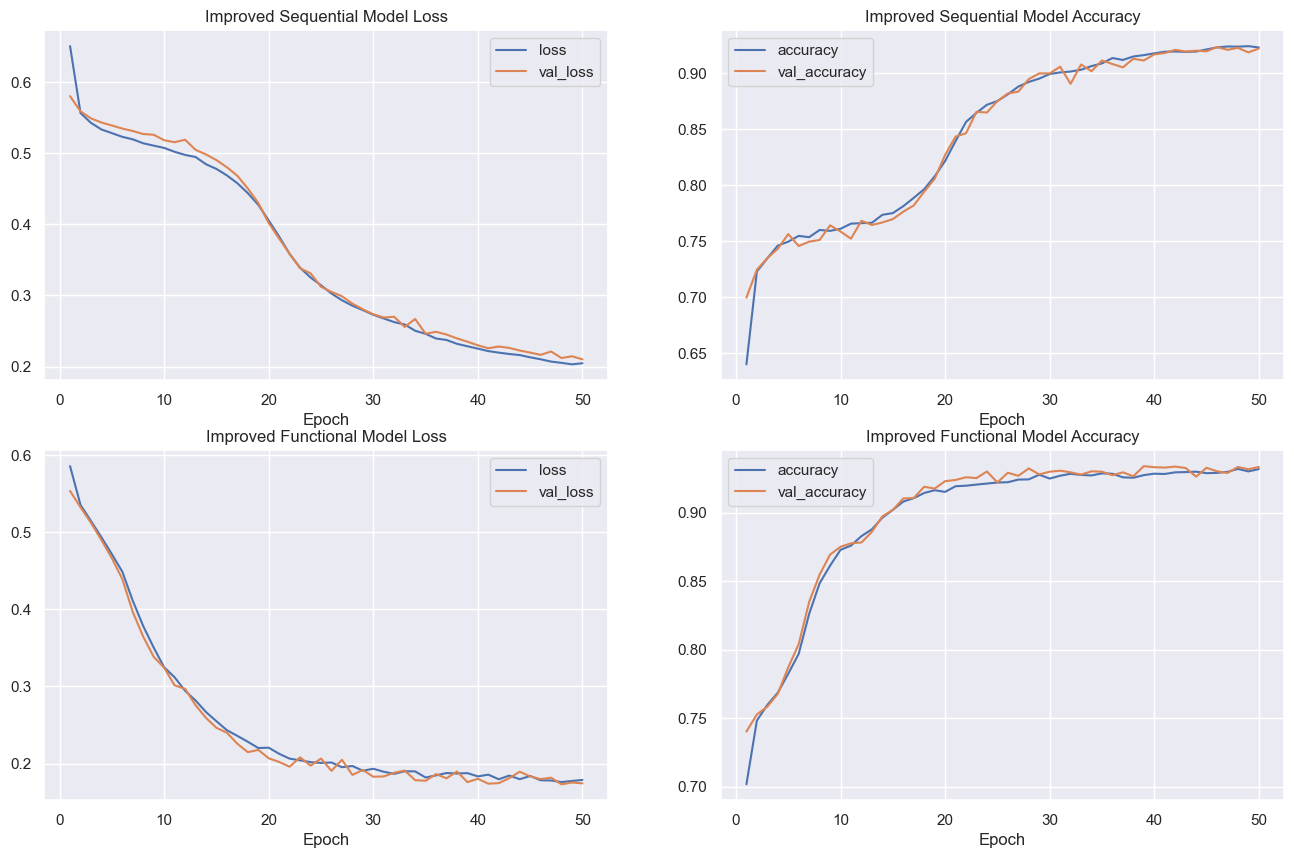

In [69]:
epoch=50

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,10))

# plotting loss on optimized sequential model 
ax[0,0].plot(range(1,epoch+1),history_s2.history['loss'],label='loss')
ax[0,0].plot(range(1,epoch+1),history_s2.history['val_loss'],label='val_loss')
ax[0,0].set_title('Improved Sequential Model Loss')
ax[0,0].legend()
ax[0,0].set_xlabel('Epoch')

# plotting accuracy on optimized sequential model
ax[0,1].plot(range(1,epoch+1),history_s2.history['accuracy'],label='accuracy')
ax[0,1].plot(range(1,epoch+1),history_s2.history['val_accuracy'],label='val_accuracy')
ax[0,1].set_title('Improved Sequential Model Accuracy')
ax[0,1].legend()
ax[0,1].set_xlabel('Epoch')

# plotting loss on optimized functional model 
ax[1,0].plot(range(1,epoch+1),history_f2.history['loss'],label='loss')
ax[1,0].plot(range(1,epoch+1),history_f2.history['val_loss'],label='val_loss')
ax[1,0].set_title('Improved Functional Model Loss')
ax[1,0].legend()
ax[1,0].set_xlabel('Epoch')

# plotting accuracy on optimized functional model
ax[1,1].plot(range(1,epoch+1),history_f2.history['accuracy'],label='accuracy')
ax[1,1].plot(range(1,epoch+1),history_f2.history['val_accuracy'],label='val_accuracy')
ax[1,1].set_title('Improved Functional Model Accuracy')
ax[1,1].legend()
ax[1,1].set_xlabel('Epoch')

plt.show()

From these graphs, we can see that both improved sequential and functional models have higher accuracy for validation data around 0.92 but we have less exploding gradient which means the models are more stable. This shows improvement from the previous models that we created.

In [70]:
y_prob_s2 = model_s2.predict(X_test_final)
y_pred_s2 = np.round(y_prob_s2)
print(classification_report(y_test,y_pred_s2))
print('AUC:',roc_auc_score(y_test,y_prob_s2))

116/116 [==============================] - 0s 677us/step
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1698
           1       0.94      0.90      0.92      2002

    accuracy                           0.92      3700
   macro avg       0.92      0.92      0.92      3700
weighted avg       0.92      0.92      0.92      3700

AUC: 0.9667564473218184


In [71]:
y_prob_f2 = model_f2.predict(X_test_final)
y_pred_f2 = np.round(y_prob_f2)
print(classification_report(y_test,y_pred_f2))
print('AUC:',roc_auc_score(y_test,y_prob_f2))

116/116 [==============================] - 0s 666us/step
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1698
           1       0.93      0.93      0.93      2002

    accuracy                           0.92      3700
   macro avg       0.92      0.92      0.92      3700
weighted avg       0.92      0.92      0.92      3700

AUC: 0.9690895088421589


Beside less exploding gradient, we can also see that both improved models have slightly higher AUC score which means the improved models are better classifier than the previous models. The accuracy of the improved models are also higher than the previous models. The improved sequential and functional model has 0.92 accuracy score on the test set.

# 9 - Conclusion

Based on what we have done in this notebook, we can get some conclusion:

1. The dataset is about **customers churn** from a start up service company.

2. The **first 2 models we created have gradient problems**, which is exploding gradient. This might happen because we are **choosing the wrong parameters** when we creating the models' architecture or **the optimizer** when we compile the model.

3. The **improved models is proven better** than the first models with **no gradient problems** and **higher accuracy** score. The improved **have less layers and neurons** than the first models we created. We also **change the parameters** when we created the improved models (**without batch normalization**) and **the optimizer** when we compiled the models (**first models use RMSprop, the improved models used Adam with learning rate 0.001**).

4. From two improved models we created, **the improved functional model are better** than the improved sequential model with **slightly higher AUC score (0.97)** but same **accuracy (0.92)** on data test.

# 10 - Model Saving

In [73]:
# Model Saving

with open('preprocessor.pkl', 'wb') as file_1:
  pickle.dump(preprocessor, file_1)

model_f2.save('model.h5')